# Using Convolutional Neural Networks (CNN) to classify Images

We will use the **[PyTorch](https://pytorch.org/)** open source Python distributio  to define a Convolutional Neaural Network that will be trained on the Natural Images dataset [1] by *Prasun Roy*.


## Convolutional Neural Network (CNN)

A **convolutional neural network (CNN)** consists of an input and an output layer, as well as multiple hidden layers. The hidden layers of a CNN typically consist of a series of **convolutional layers** that convolve with a multiplication or other dot product. The activation function is commonly a *REctified Linear Unit (RELU) layer*, and is subsequently followed by additional convolutions such as **pooling layers**, **fully connected layers** and **normalization layers**, referred to as *hidden layers* because their inputs and outputs are masked by the activation function and final convolution. The final convolution, in turn, often involves backpropagation in order to more accurately weight the end product.[2]

To recap, a CNN have
1. Convolutional Layers
2. Pooling Layers
3. Fully Connected Layers
4. Nornalization Layers
where 2,3,4 are *hidden layers*. 

![a](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)



### Convolutional Layers 

When programming a CNN, the input is a tensor with shape (number of images, (image width , image height), image depth). Then after passing through a convolutional layer, the image becomes abstracted to a feature map, with shape (number of images, (feature map width, feature map height) , feature map channels). A **convolutional layer** within a neural network should have the following attributes:
    * Convolutional kernels defined by a width and height (hyper-parameters).
    * The number of input channels and output channels (hyper-parameter).
    * The depth of the Convolution filter (the input channels) must be equal to the number channels (depth) of the input feature map.

Convolutional layers convolve the input and pass its result to the next layer. The convolution operation brings a solution to the problem arising from the presence of a huge number of input data (i.e. the number of pixels) as it reduces the number of free parameters, allowing the network to be deeper with fewer parameters.

The convolutional layer is the core building block of a CNN. The layer's parameters consist of a set of learnable filters (or kernels), which have a small receptive field, but extend through the full depth of the input volume. During the forward pass, each filter is convolved across the width and height of the input volume, computing the dot product between the entries of the filter and the input and producing a 2-dimensional activation map of that filter. As a result, the network learns filters that activate when it detects some specific type of feature at some spatial position in the input. 

Stacking the activation maps for all filters along the depth dimension forms the full output volume of the convolution layer. Every entry in the output volume can thus also be interpreted as an output of a neuron that looks at a small region in the input and shares parameters with neurons in the same activation map.

### Pooling 

Convolutional networks may include **local** or **global pooling layers** to streamline the underlying computation. Pooling layers *reduce the dimensions of the data* by combining the outputs of neuron clusters at one layer into a single neuron in the next layer. Local pooling combines small clusters, typically 2 x 2. 

Global pooling acts on all the neurons of the convolutional layer. In addition, pooling may compute a max or an average. *Max pooling* uses the maximum value from each of a cluster of neurons at the prior layer. *Average pooling* uses the average value from each of a cluster of neurons at the prior layer.

![a](https://upload.wikimedia.org/wikipedia/commons/e/e9/Max_pooling.png)

### Fully Connected Layers

**Fully connected layers** connect every neuron in one layer to every neuron in another layer. It is in principle the same as the traditional multi-layer perceptron neural network (MLP). The flattened matrix goes through a fully connected layer to classify the images.

#### Receptive Fields

In neural networks, each neuron receives input from some number of locations in the previous layer. In a *fully connected layer*, *each* neuron receives input from every element of the previous layer. In a *convolutional layer*, neurons receive input from *only a restricted subarea* of the previous layer. Typically the subarea is of a square shape (e.g., size 5 by 5). The input area of a neuron is called its **receptive field**. 

So: 

1. in a **fully connected layer**, the receptive field is the *entire previous layer*. 
2. In a **convolutional layer**, the receptive area is smaller than the entire previous layer.

### Weights

Each neuron in a neural network computes an output value by applying a specific function to the input values coming from the receptive field in the previous layer (e.g. *perceptron* [3]). The function that is applied to the input values is determined by a vector of weights and a bias (typically real numbers). Learning, in a neural network, progresses by making iterative adjustments to these biases and weights.

The vector of weights and the bias are called **filters** and represent particular features of the input (e.g., a particular shape). 

A distinguishing feature of CNNs is that many neurons can *share the same filter*. This reduces memory footprint because a single bias and a single vector of weights are used across all receptive fields sharing that filter, as opposed to each receptive field having its own bias and vector weighting. 


### Backpropagation

**Backpropagation** is an algorithm widely used in the training of feedforward neural networks for supervised learning; generalizations exist for other artificial neural networks (ANNs), and for functions generally. Backpropagation efficiently computes the gradient of the loss function with respect to the weights of the network for a single input-output example. This makes it feasible to use gradient methods for training multi-layer networks, updating weights to minimize loss; commonly one uses gradient descent or variants such as stochastic gradient descent. The backpropagation algorithm works by computing the gradient of the loss function with respect to each weight by the chain rule, iterating backwards one layer at a time from the last layer to avoid redundant calculations of intermediate terms in the chain rule; this is an example of dynamic programming. [4], [5].

When we train a CNN, we perform mulitple passes forward through the network of layers, and then use a *loss function* to measure the difference between the output values (which you may recall are probability predictions for each class) and the actual values for the known image classes used to train the model (in other words, 1 for the correct class and 0 for all the others). For example, if our CNN have three possibile classes $[C_1, C_2, C_3]$ and, e.g.,  predicted probabilities are 0.15 for $C_1$, 0.8 for $C_2$, and 0.05 for $C_2$. Let's suppose that the image in question is an example of $C_2$, so the expected output is actually 0 for$C_1$, 1 for $C_2$, and 0 for $C_3$. The error (or *loss*) represents how far from the expected values our results are.

Having calculated the loss, the training process uses a specified *optimizer* to calculate the derivitive of the loss function wit respect to the weights and biases used in the network layers, and determine how best to adjust them to reduce the loss. We then go backwards through the network, adjusting the weights before the next forward pass. The degree to which we adjust the weights is determined by the *learning rate* - the larger the learning rate, the bigger the adjustments made to the weights.

### Counteracting Overfitting: Data Augmentation and Drop Layers

#### Overfitting

In statistics, overfitting is 
> the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably.

An overfitted model is a statistical model that contains more parameters than can be justified by the data. The essence of overfitting is to have unknowingly extracted some of the residual variation (i.e. the noise) as if that variation represented underlying model structure. [6] 

![b](https://upload.wikimedia.org/wikipedia/commons/1/1f/Overfitting_svg.svg)

In the image above: *training error* is shown in blue, *validation error* in red, both as a function of the number of training epochs. If the validation error increases (positive slope) while the training error steadily decreases (negative slope), then a situation of overfitting may have occurred. 

The best predictive and fitted model would be where the validation error has its global minimum.

#### Data Augmentation

One way to mitigate the overfitting problem is to perform *data augmentation* by making random transformations of the training images; for example by *flipping*, *rotating*, or *cropping* the images. 

Because these data augmentation transformations are randomly applied during training, the same image might be presented differently from batch to batch, creating more variation in the training data and helping the model to learn features based the same objects at different orientations or scales.

#### Drop Layers

During the training process, the convolution and pooling layers in the feature extraction section of the model generate lots of feature maps from the training images. Randomly dropping some of these feature maps helps vary the features that are extracted in each batch, ensuring the model doesn't become overly-reliant on any one dominant feature in the training data. [7]


-----

### App. A: Basics of Artificial Neural Networks

**Artificial neural networks** (ANN or NN)  are computing systems that are inspired by, but not identical to, biological neural networks that constitute animal brains. Such systems *learn* to perform tasks by considering examples, generally without being programmed with task-specific rules.

A NN is based on a collection of connected units or nodes called **artificial neurons**, which loosely model the neurons in a biological brain. The basic example is the **perceptron**[a] . Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron that receives a signal then processes it and can signal neurons connected to it.

![a](https://www.allaboutcircuits.com/uploads/articles/how-to-perform-classification-using-a-neural-network-a-simple-perceptron-example_rk_aac_image2.jpg)

In ANN implementations, the "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times. [b], 

#### Single-layer and Multi-layer perceptrons

A **single layer perceptron (SLP)** is a feed-forward network based on a threshold transfer function. SLP is the simplest type of artificial neural networks and can only classify linearly separable cases with a binary target (1, 0). [c], [d]

Because SLP is a linear classifier and if the cases are not linearly separable the learning process will never reach a point where all the cases are classified properly. The most famous example of the inability of perceptron to solve problems with linearly non-separable cases is the XOR problem.

A **multi-layer perceptron (MLP)** has the same structure of a single layer perceptron with one or more hidden layers. The backpropagation algorithm consists of two phases: the forward phase where the activations are propagated from the input to the output layer, and the backward phase, where the error between the observed actual and the requested nominal value in the output layer is propagated backwards in order to modify the weights and bias values. 	

![a](https://www.saedsayad.com/images/Perceptron_bkp_1.png)

-----

### About the Dataset
#### Natural Images
This dataset is created as a benchmark dataset for the work on Effects of Degradations on Deep Neural Network Architectures.
The source code is publicly available on GitHub.

#### Description
This dataset contains 6,899 images from 8 distinct classes compiled from various sources (see Acknowledgements). The classes include airplane, car, cat, dog, flower, fruit, motorbike and person.

#### Acknowledgements

1. Airplane images obtained from http://host.robots.ox.ac.uk/pascal/VOC
2. Car images obtained from https://ai.stanford.edu/~jkrause/cars/car_dataset.html
3. Cat images obtained from https://www.kaggle.com/c/dogs-vs-cats
4. Dog images obtained from https://www.kaggle.com/c/dogs-vs-cats
5. Flower images obtained from http://www.image-net.org
6. Fruit images obtained from https://www.kaggle.com/moltean/fruits
7. Motorbike images obtained from http://host.robots.ox.ac.uk/pascal/VOC
8. Person images obtained from http://www.briancbecker.com/blog/research/pubfig83-lfw-dataset


-----
[1] https://www.kaggle.com/prasunroy/natural-images

[2] https://en.wikipedia.org/wiki/Convolutional_neural_network

[3] https://en.wikipedia.org/wiki/Perceptron

[4] https://en.wikipedia.org/wiki/Backpropagation

[5] https://becominghuman.ai/back-propagation-in-convolutional-neural-networks-intuition-and-code-714ef1c38199

[6] https://en.wikipedia.org/wiki/Overfitting

[7] https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/

[a] https://en.wikipedia.org/wiki/Perceptron

[b] https://en.wikipedia.org/wiki/Artificial_neural_network

[c] https://www.saedsayad.com/artificial_neural_network_bkp.htm

[d] https://iamtrask.github.io/2015/07/12/basic-python-network/

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
import seaborn as sns

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import shutil
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# The images are in a folder named 'input/natural-images/natural_images'
training_folder_name = '../input/natural-images/data/natural_images'

# All images are 128x128 pixels
img_size = (128,128)

# The folder contains a subfolder for each class of shape
classes = sorted(os.listdir(training_folder_name))
print(classes)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [3]:
# Import PyTorch libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.3.0


* # Preliminaries I: standardize the images' size

1. We have a huge amount of images with different sizes and shapes. We will this define a resizing function **resize_image** that resize consistently the image to a shape passed to the function by the user (by default is (128,128)), as done in my notebook on [image pre-treatment](https://www.kaggle.com/androbomb/image-pre-treatment). 

In [4]:
from PIL import Image

# function to resize image
def resize_image(src_image, size=(128,128), bg_color="white"): 
    from PIL import Image, ImageOps 
    
    # resize the image so the longest dimension matches our target size
    src_image.thumbnail(size, Image.ANTIALIAS)
    
    # Create a new square background image
    new_image = Image.new("RGB", size, bg_color)
    
    # Paste the resized image into the center of the square background
    new_image.paste(src_image, (int((size[0] - src_image.size[0]) / 2), int((size[1] - src_image.size[1]) / 2)))
  
    # return the resized image
    return new_image

In [5]:
training_folder_name = '../input/natural-images/data/natural_images'

# New location for the resized images
train_folder = '../working/data/natural_images'


# Create resized copies of all of the source images
size = (128,128)

# Create the output folder if it doesn't already exist
if os.path.exists(train_folder):
    shutil.rmtree(train_folder)

# Loop through each subfolder in the input folder
print('Transforming images...')
for root, folders, files in os.walk(training_folder_name):
    for sub_folder in folders:
        print('processing folder ' + sub_folder)
        # Create a matching subfolder in the output dir
        saveFolder = os.path.join(train_folder,sub_folder)
        if not os.path.exists(saveFolder):
            os.makedirs(saveFolder)
        # Loop through the files in the subfolder
        file_names = os.listdir(os.path.join(root,sub_folder))
        for file_name in file_names:
            # Open the file
            file_path = os.path.join(root,sub_folder, file_name)
            #print("reading " + file_path)
            image = Image.open(file_path)
            # Create a resized version and save it
            resized_image = resize_image(image, size)
            saveAs = os.path.join(saveFolder, file_name)
            #print("writing " + saveAs)
            resized_image.save(saveAs)

print('Done.')

Transforming images...
processing folder airplane
processing folder dog
processing folder fruit
processing folder cat
processing folder flower
processing folder person
processing folder car
processing folder motorbike
Done.


# Preliminaries II: prepare and augment the data

PyTorch [1]  includes functions for loading and transforming data, as **[torchvision.datasets.ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html)** .

We will use these to create an iterative loader for *training data*, and a second iterative loader for *test data*. 

The loaders will transform the image data into *tensors*, which are the core data structure used in PyTorch, and normalize them so that the pixel values are in a scale with a mean of 0.5 and a standard deviation of 0.5.

At this point we can add transformations to randomly modify the images as they are added to a training batch. In this case, we will flip images horizontally at random. This is done to prevent **overfitting**. The transformations are done using **torchvision.transforms** [2]. The basic transformations available are
1. transforms.RandomVerticalFlip(p=0.5)
2. transforms.RandomHorizontalFlip(p=0.5)
3. transforms.RandomRotation(degrees, resample=False, expand=False, center=None, fill=0)
4. transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2)
    * Crop the given PIL Image to random size and aspect ratio.

-----
[1] https://pytorch.org/

[2] https://pytorch.org/docs/stable/torchvision/transforms.html

In [6]:
def load_dataset(data_path):
    import torch
    import torchvision
    import torchvision.transforms as transforms
    # Load all the images
    transformation = transforms.Compose([
        # Randomly augment the image data
            # Random horizontal flip
        transforms.RandomHorizontalFlip(0.5),
            # Random vertical flip
        transforms.RandomVerticalFlip(0.3),
        # transform to tensors
        transforms.ToTensor(),
        # Normalize the pixel values (in R, G, and B channels)
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    # Load all of the images, transforming them
    full_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transformation
    )
    
    
    # Split into training (70% and testing (30%) datasets)
    train_size = int(0.7 * len(full_dataset))
    test_size = len(full_dataset) - train_size
    
    # use torch.utils.data.random_split for training/test split
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    
    # define a loader for the training data we can iterate through in 50-image batches
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
    
    # define a loader for the testing data we can iterate through in 50-image batches
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
        
    return train_loader, test_loader




#####################################################################################################




# Recall that we have resized the images and saved them into
train_folder = '../working/data/natural_images'

# Get the iterative dataloaders for test and training data
train_loader, test_loader = load_dataset(train_folder)
batch_size = train_loader.batch_size
print("Data loaders ready to read", train_folder)

Data loaders ready to read ../working/data/natural_images


# Defining the Convolutional Neural Network

In PyTorch, you define a neural network model as a class that is derived from the **[nn.Module](https://pytorch.org/docs/stable/_modules/torch/nn/modules/module.html)** base class. 

Your class must define the layers in the network, and provide a *forward* method that is used to process data through the layers of the network.

As in the kernel [MNIST_ale_CNN](https://www.kaggle.com/androbomb/mnist-ale-cnn), where we used keras to create a CNN to apply it to the standard MNIST database, we build a CNN as following:

We now need to create our Convolutional Neural Network model. In order to do so, we need to choose the convolution and poolying layers.

We will thus:

1. Define the model as a sequential layers
2. Introduce the Convolutions. 
    * they are important to create a feature map
3. Introduce the Poolings
    * MaxPooling is used to reduce dimensionality. In MaxPooling, the output value is just the maximum of the input values in each patch (for ex. The maximum pixel in a span of 3 pixels).
4. Flatten the data in order to have a np.array to feed the NN

In particoular, we will apply

1. 16 3x3 Convolution matrix with activation='relu', i.e. a Rectified Linear Unit (ReLU) activation.
2. A 2x2 MaxPooling
3. 32 3x3 Convolution matrix with activation='relu', i.e. a Rectified Linear Unit (ReLU) activation.
4. A 2x2 MaxPooling
5. 64 3x3 Convolution matrix with activation='relu', i.e. a Rectified Linear Unit (ReLU) activation.
6. A 2x2 MaxPooling
7. 64 3x3 Convolution matrix with activation='relu', i.e. a Rectified Linear Unit (ReLU) activation.
8. A 2x2 MaxPooling

As a optimaizer, we decided to use the **ADAM (ADAptive Moment estimation)** optimization algorithm, that is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing. For more on optimizers in PyTorch, see [1]

Notice that we have a layer that randomly drops 20% of the features to prevent **overfitting**. 

-----
[1] https://pytorch.org/docs/stable/optim.html#algorithms

In [7]:
# Create a neural net class
class Net(nn.Module):
    
    
    # Defining the Constructor
    def __init__(self, num_classes=3):
        super(Net, self).__init__()
        
        # In the init function, we define each layer we will use in our model
        
        # Our images are RGB, so we have input channels = 3. 
        # We will apply 12 filters in the first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        
        # A second convolutional layer takes 12 input channels, and generates 24 outputs
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        
        # We in the end apply max pooling with a kernel size of 2
        self.pool = nn.MaxPool2d(kernel_size=2)
        
        # A drop layer deletes 20% of the features to help prevent overfitting
        self.drop = nn.Dropout2d(p=0.2)
        
        # Our 128x128 image tensors will be pooled twice with a kernel size of 2. 128/2/2 is 32.
        # This means that our feature tensors are now 32 x 32, and we've generated 24 of them
        
        # We need to flatten these in order to feed them to a fully-connected layer
        self.fc = nn.Linear(in_features=32 * 32 * 24, out_features=num_classes)

    def forward(self, x):
        # In the forward function, pass the data through the layers we defined in the init function
        
        # Use a ReLU activation function after layer 1 (convolution 1 and pool)
        x = F.relu(self.pool(self.conv1(x))) 
        
        # Use a ReLU activation function after layer 2
        x = F.relu(self.pool(self.conv2(x)))  
        
        # Select some features to drop to prevent overfitting (only drop during training)
        x = F.dropout(self.drop(x), training=self.training)
        
        # Flatten
        x = x.view(-1, 32 * 32 * 24)
        # Feed to fully-connected layer to predict class
        x = self.fc(x)
        # Return class probabilities via a log_softmax function 
        return torch.log_softmax(x, dim=1)
    
device = "cpu"
if (torch.cuda.is_available()):
    # if GPU available, use cuda (on a cpu, training will take a considerable length of time!)
    device = "cuda"

# Create an instance of the model class and allocate it to the device
model = Net(num_classes=len(classes)).to(device)

print(model)

Net(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout2d(p=0.2, inplace=False)
  (fc): Linear(in_features=24576, out_features=8, bias=True)
)


### Training function

Training consists of an iterative series of forward passes in which the training data is processed in batches by the layers in the network, and the optimizer goes back and adjusts the weights. We will also use a separate set of test images to test the model at the end of each *epoch*, so we can track the performance improvement as the training process progresses. 



The traning function we need to define needs the following steps: 

1. Set the model to training mode;
2. Process the images in batches; we will iterate over images in batches. Inside each batches, we have to
    1.  Import labels and features;
    2. Reset the optimizer
    3. Push the data forward through the layers of the model
    4. compute the loss
    5. Backpropagate
3.  Compute the Average Loss of the Model during the Epoch

We will thus calling eath once per epoch. 

In [8]:
def train(model, device, train_loader, optimizer, epoch):
    # Set the model to training mode
    model.train()
    train_loss = 0
    print("Epoch:", epoch)
    # Process the images in batches
    for batch_idx, (data, target) in enumerate(train_loader):
        # Use the CPU or GPU as appropriate
        # Recall that GPU is optimized for the operations we are dealing with
        data, target = data.to(device), target.to(device)
        
        # Reset the optimizer
        optimizer.zero_grad()
        
        # Push the data forward through the model layers
        output = model(data)
        
        # Get the loss
        loss = loss_criteria(output, target)

        # Keep a running total
        train_loss += loss.item()
        
        # Backpropagate
        loss.backward()
        optimizer.step()
        
        # Print metrics so we see some progress
        print('\tTraining batch {} Loss: {:.6f}'.format(batch_idx + 1, loss.item()))
            
    # return average loss for the epoch
    avg_loss = train_loss / (batch_idx+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

### Test function: 

Here we need the model in evaluation mode to get the accuray by confronting with the labels (we don't propagate anything here). So

1. Set the model to evaluation mode;
2. Process the images in batches; we will iterate over images in batches. Inside each batches, we have to
    1. Get the prediction for each image in the batch
    2. Calculate the loss for the batch
    3. Calculate the accuracy for this batch
3. Calculate the average accuracy and loss for the epoch

In [9]:
def test(model, device, test_loader):
    # Switch the model to evaluation mode (so we don't backpropagate or drop)
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for data, target in test_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)
            
            # Get the predicted classes for this batch
            output = model(data)
            
            # Calculate the loss for this batch
            test_loss += loss_criteria(output, target).item()
            
            # Calculate the accuracy for this batch
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target==predicted).item()

    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss / batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

## Training the Model


#### Adam optimizer
When training the Model, we use the **ADAM** optimizer [1], [2], that is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks. 

Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum. It uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself like SGD with momentum. Let’s take a closer look at how it works.
Adam is an adaptive learning rate method, which means, it computes individual learning rates for different parameters. Its name is derived from adaptive moment estimation, and the reason it’s called that is because Adam uses estimations of first and second moments of gradient to adapt the learning rate for each weight of the neural network.


#### Loss Criteria
As a loss criteria we use the **Cross Entropy Loss** (log loss), that measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0. [3]


------
[1] https://arxiv.org/abs/1412.6980

[2] https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c

[3] https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

In [10]:
# Use an "Adam" optimizer to adjust weights
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Specify the loss criteria
loss_criteria = nn.CrossEntropyLoss()

# Track metrics in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 10 epochs (We restrict to 10 for time issues)
epochs = 10
print('Training on', device)
for epoch in range(1, epochs + 1):
        train_loss = train(model, device, train_loader, optimizer, epoch)
        test_loss = test(model, device, test_loader)
        epoch_nums.append(epoch)
        training_loss.append(train_loss)
        validation_loss.append(test_loss)

Training on cpu
Epoch: 1
	Training batch 1 Loss: 2.079145
	Training batch 2 Loss: 10.118187
	Training batch 3 Loss: 2.646740
	Training batch 4 Loss: 2.111869
	Training batch 5 Loss: 1.669168
	Training batch 6 Loss: 1.639455
	Training batch 7 Loss: 1.575683
	Training batch 8 Loss: 1.656426
	Training batch 9 Loss: 1.292582
	Training batch 10 Loss: 1.051112
	Training batch 11 Loss: 0.823093
	Training batch 12 Loss: 1.064131
	Training batch 13 Loss: 0.981580
	Training batch 14 Loss: 1.005966
	Training batch 15 Loss: 0.900591
	Training batch 16 Loss: 0.643629
	Training batch 17 Loss: 0.826972
	Training batch 18 Loss: 0.981924
	Training batch 19 Loss: 0.639102
	Training batch 20 Loss: 0.750890
	Training batch 21 Loss: 0.772048
	Training batch 22 Loss: 0.591403
	Training batch 23 Loss: 1.003661
	Training batch 24 Loss: 0.664557
	Training batch 25 Loss: 0.560226
	Training batch 26 Loss: 0.617326
	Training batch 27 Loss: 0.651283
	Training batch 28 Loss: 0.579034
	Training batch 29 Loss: 0.6103

## View Loss History

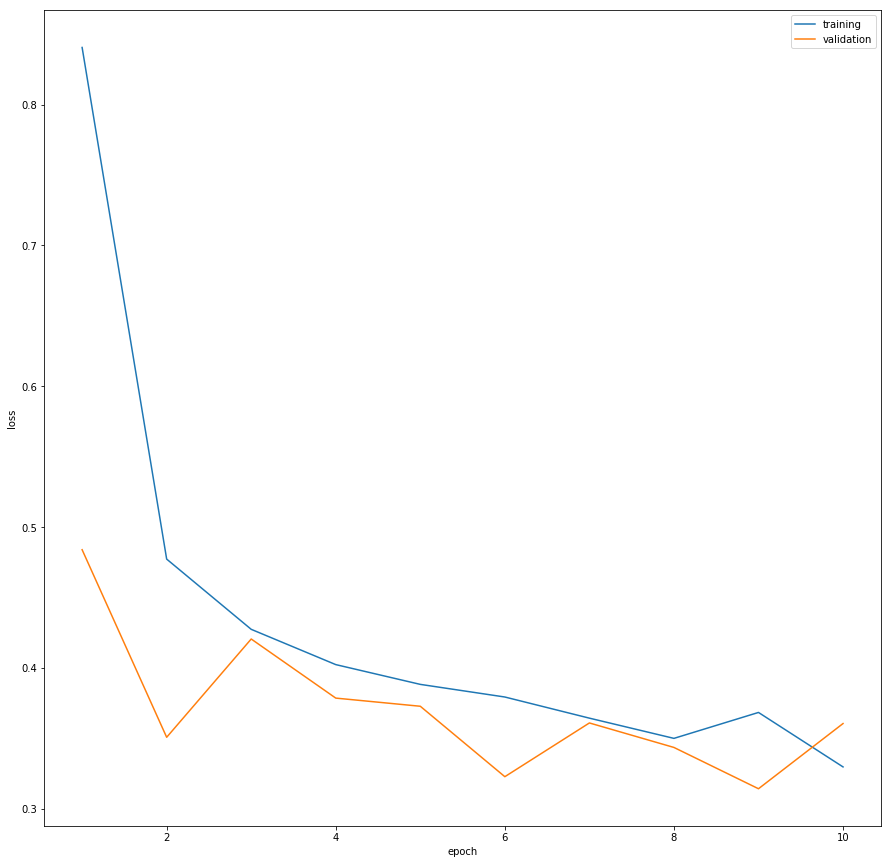

In [11]:
plt.figure(figsize=(15,15))
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

# Evaluate the Model

Getting predictions from test set...


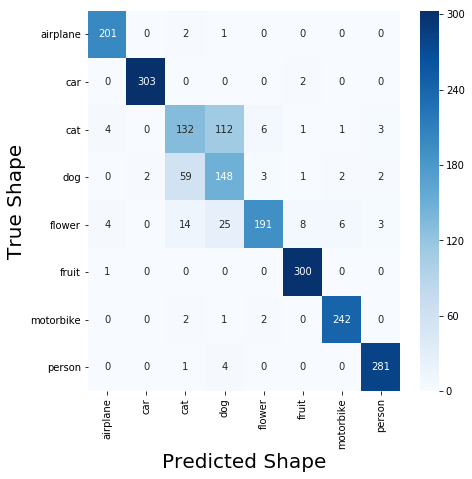

In [12]:
# Defining Labels and Predictions
truelabels = []
predictions = []
model.eval()
print("Getting predictions from test set...")
for data, target in test_loader:
    for label in target.data.numpy():
        truelabels.append(label)
    for prediction in model(data).data.numpy().argmax(1):
        predictions.append(prediction) 

# Plot the confusion matrix
cm = confusion_matrix(truelabels, predictions)
tick_marks = np.arange(len(classes))

df_cm = pd.DataFrame(cm, index = classes, columns = classes)
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Shape", fontsize = 20)
plt.ylabel("True Shape", fontsize = 20)
plt.show()

We can see that there is a huge mislassification among dog and cats. It is somewhat expected, since dogs and cat looks alike, and we need a well deeper CNN to properly classify them. 


A somewhat unexpected classification error is the superposition of Flowers upon Dog/Cats, instead of fruits that are well classified!

Here we insert a code to cancel the images we have resized and saved into the '../working' folder due to the fact that Kaggle limits to 500 the number of output files:

In [13]:
import shutil
shutil.rmtree("../working/data/natural_images")

I hope you enjoyed the reading!